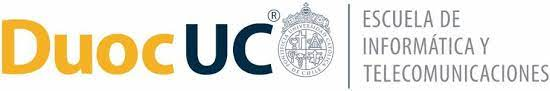

# Examen Transversal: Caso Forma A


Integrantes: 
* Cristian Contreras
* Diego Gieminiani 
* Alejandro Ferrera

Docente: Marco Antonio Japke    

Sección: DLY0100 - 003V

## Parte 0. Conocimiento y Entendimiento del negocio 




Instalación e importación de librerias

In [1]:
%pip install tensorflow > NUL 2>&1
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.


Cargamos el dataset desde tensorflow.keras y lo guardamos en las divisiones correspondientes

In [18]:
fashion_mnist = keras.datasets.fashion_mnist

# Cargamos el dataset, notemos que ya viene dividido
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(f'''Notamos que el dataset consta de {(X_train_full.shape[0] + X_test.shape[0]):,} imágenes de {X_train_full.shape[1]}x{X_train_full.shape[2]} pixeles cada una.
Además, cada pixel tiene un valor entre {X_train_full.min()} y {X_train_full.max()}.\nEl cual esta dividido en {X_train_full.shape[0]:,} registros de entrenamiento y {X_test.shape[0]:,} de prueba.
También, cada registro tiene una etiqueta que puede ser {np.unique(y_train_full)}.\n''')


Notamos que el dataset consta de 70,000 imágenes de 28x28 pixeles cada una.
Además, cada pixel tiene un valor entre 0 y 255.
El cual esta dividido en 60,000 registros de entrenamiento y 10,000 de prueba.
También, cada registro tiene una etiqueta que puede ser [0 1 2 3 4 5 6 7 8 9].



Usaremos nombres para los tipos de registros en vez de indices según la tabla adjunta.

In [19]:
class_names = ["Camiseta/top", "Pantalón", "Suéter", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]


#### Un gráfico para visualizar algunos datos muestra del dataset

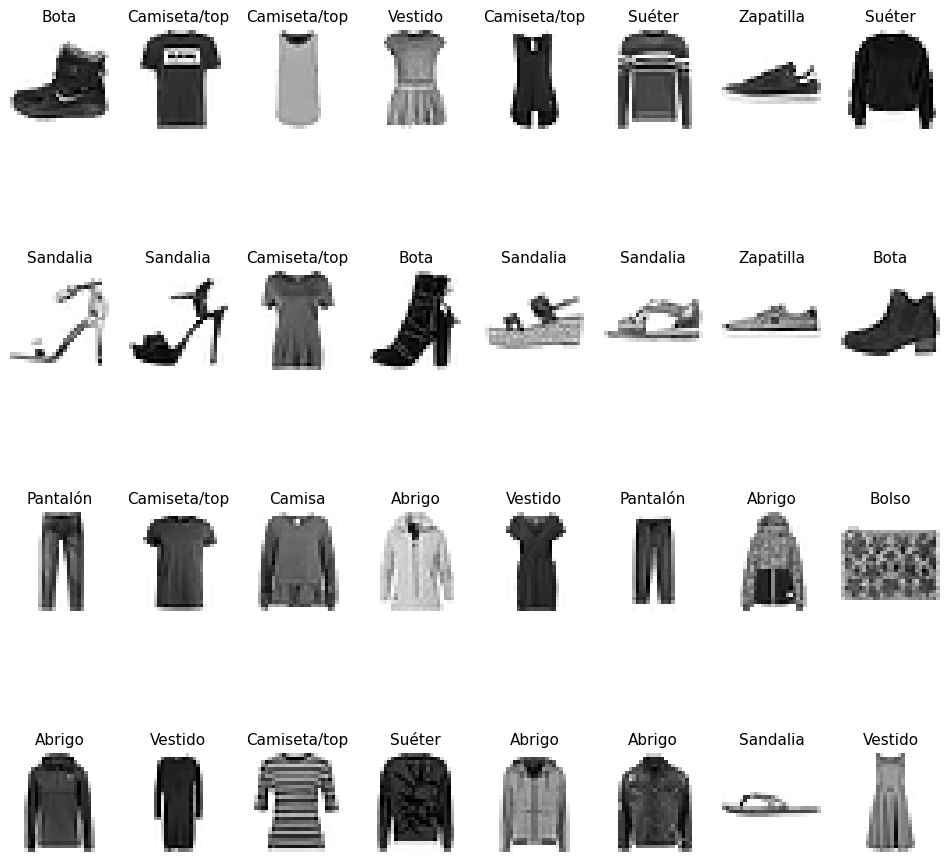

In [20]:
height = 4
width = 8
fig , axs = plt.subplots(height,width, figsize=(12,12))
for col in range(height):
    for row in range(width):
        index = col*width + row
        plt.subplot(height, width, index+1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=11)
plt.show()

In [23]:
# tamaños de capas escondidas

h1 = 128
h2 = 64
h3 = 32

In [53]:
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

c:\Users\ccont\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [55]:

h = red.fit(X, Y,
        epochs=5,
        batch_size=1,
       )

Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 66s 1ms/step - accuracy: 0.7487 - loss: 0.6805
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.8452 - loss: 0.4231
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.8612 - loss: 0.3790
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.8666 - loss: 0.3648
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.8734 - loss: 0.3405


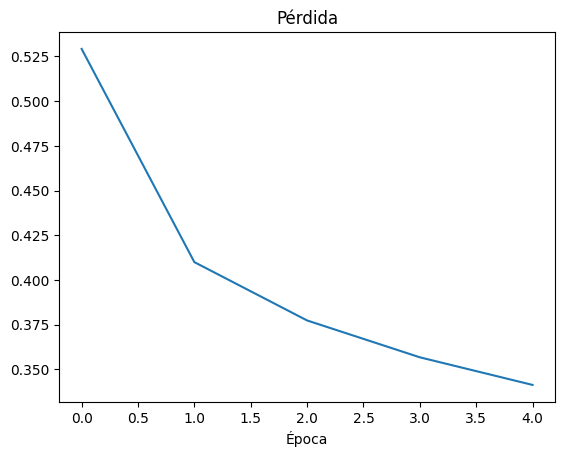

In [33]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()


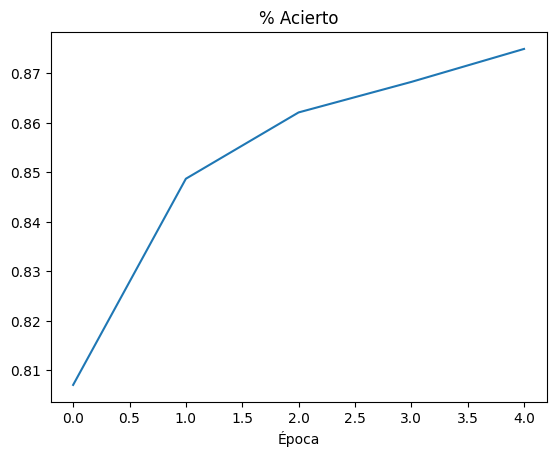

In [34]:
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

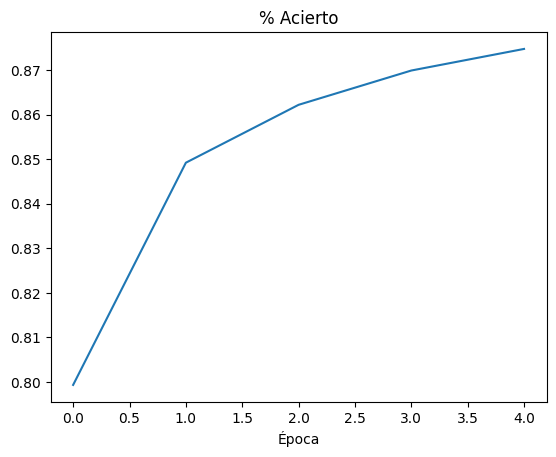

In [56]:

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


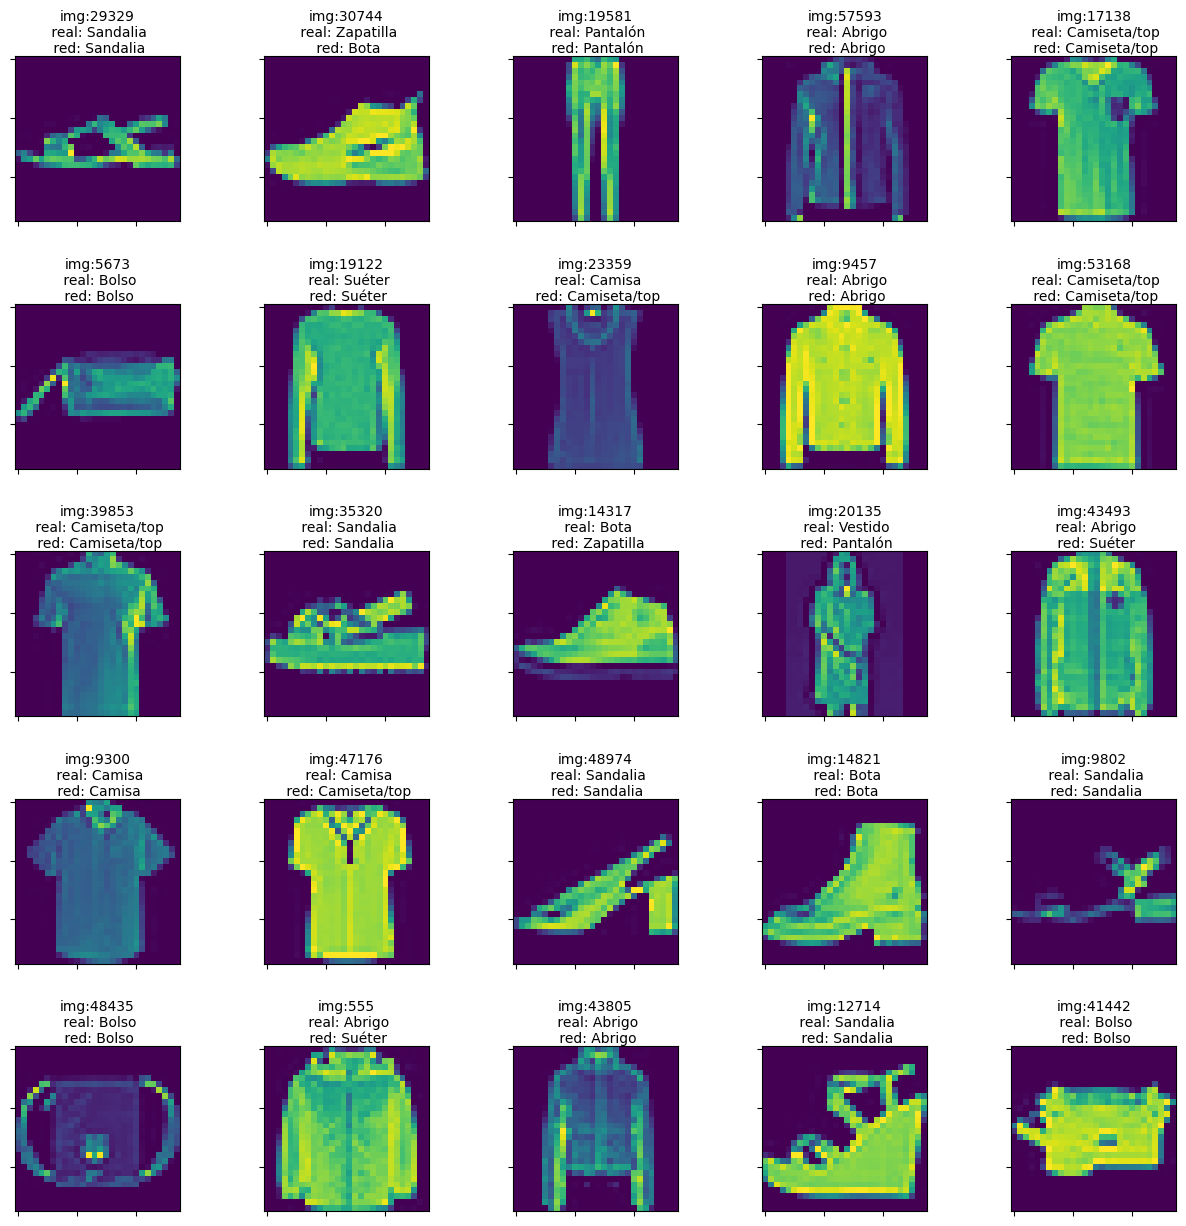

In [57]:
# Veamos algunas predicciones
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(3*h,3*w))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(X_train_full))
    Xin = X[ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)
    
    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(class_names[y_train_full[ex]]) + "\n red: " + str(class_names[lpred]), fontsize=10, pad=1)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(X_train_full[ex])

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP) 


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

Carga de dataset

Para implementar la **Red Feed Forward Fully Connected** necesitaremos realizar lo siguiente
1. Modificación del tamaño de la matriz
Cambiaremos la estructura del dataset de 60.000 imagenes de 28x28 pixeles a una muestra de 60.000 pero con un vector unidimensional

In [1]:
X_mlp = X_train_full.reshape(60000,28*28)
X_mlp

NameError: name 'X_train_full' is not defined

2. Normalizar los valores del vector, para dejarlos entre 0 y 1, para eso dividiremos los valores en 255 ya que es el maximo valor que puede tomar los datos dentro del vector

In [ ]:
X_mlp = X_mlp.astype('float32') / 255

3. Realizar one-hot encoding al dataset con las etiquetas

In [ ]:
Y_mlp = keras.utils.to_categorical(y_train_full, 10)
Y_mlp

4. Asignar variables para la cantidad de ejemplos, neuronas de entrada y neuronas de salidas

In [ ]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_mlp.shape[0]
N = X_mlp.shape[1]
C = Y_mlp.shape[1]

print(f"Ejemplos: {M}\nNeuronas de entrada: {N}\nNeuronas de salida:{C}")

5. Implementaremos las capas escondidas

In [ ]:
h1 = 256
h2 = 128
h3 = 64
h4 = 32

$$
\begin{aligned}
& \hspace{20mm} \text{Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP)} \\
& \begin{array}{cccc}
\hline \hline 
& \text{ReLu} & \text{Tanh} & \text{Sigmoid} \\
\hline \hline 
& \text{val_acc} \hspace{10mm} \text{tiempo_s} & \text{val_acc} \hspace{10mm} \text{tiempo_s} & \text{val_acc} \hspace{10mm} \text{tiempo_s} \\
\hline 
\text{__ capas ocultas} & {} & {} & {} & {} & {} & {} \\
\text{__ capas ocultas} & {} & {} & {} & {} & {} & {} \\
\text{__ capas ocultas} & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

* Ejemplo:
| 2 capas ocultas | 7.2 | 8.0 | 1.3 | 3.5 | 0.8 | 5.1 |


Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

Justificar y hacer análisis aquí.

## Parte 4. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ __ capas } & \text { __ epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

Tabla 1.2. Comparando Optimizadores

| N° Capas | N° Épocas | SGD                            | ADAM                           | RMsProp                        | Otro*                          |
|----------|-----------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|
|          |           | val_acc          Loss         | val_acc          Loss         | val_acc          Loss         | val_acc          Loss         |
|----------|-----------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| __ capas | __ epocas |                  |                  |                  |                  |                  |                  |                  |


*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1 

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon. 

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso. 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.
 

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.